In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns
import numpy as np

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#custom style HTML output

from IPython.core.display import HTML

csspath1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-table.css'
csspath2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-notebook.css'

css = open(csspath1).read() + open(csspath2).read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Read in data

CPS = pd.read_csv('DATA\CPSData.csv')

In [4]:
# How many interviewees are in the dataset?

len(CPS)

131302

In [5]:
CPS.head(1)

,PeopleInHousehold,Region,State,MetroAreaCode,Age,Married,Sex,Education,Race,Hispanic,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry
0,1,South,Alabama,26620.0,85,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Retired,NaN


In [6]:
# Among the interviewees with a value reported 
# for the Industry variable, what is the most common 
# industry of employment? Please enter the name exactly 
# how you see it.

CPS.Industry[CPS.Industry.notnull()].value_counts().head()

Educational and health services       15017
Trade                                  8933
Professional and business services     7519
Manufacturing                          6791
Leisure and hospitality                6364
Name: Industry, dtype: int64

In [7]:
# Which state has the largest number of interviewees?

CPS.State.value_counts().head(3)

California    11570
Texas          7077
New York       5595
Name: State, dtype: int64

In [8]:
# Which state has the fewest interviewees?

CPS.State.value_counts().tail(3)

Mississippi    1230
Montana        1214
New Mexico     1102
Name: State, dtype: int64

In [9]:
# Which state has the fewest interviewees?
# Which state has the largest number of interviewees?
# (One line solution)

CPS.State.value_counts().iloc[[0,-1]]

California    11570
New Mexico     1102
Name: State, dtype: int64

In [10]:
# What proportion of interviewees are citizens of the United States?
# (get normalized proportion instead of real count)

CPS.Citizenship.value_counts(normalize=True)

Citizen, Native         0.888326
Non-Citizen             0.057806
Citizen, Naturalized    0.053868
Name: Citizenship, dtype: float64

In [11]:
# What proportion of interviewees are citizens of the United States?
# (add native and naturalized citizen proportions)

CPS.Citizenship.value_counts(normalize=True).iloc[[0,2]].sum()

0.9421943306271039

In [12]:
# For which races are there at least 250 interviewees 
# in the CPS dataset of Hispanic ethnicity?
# (1 means Hispanic)

CPS.Hispanic.value_counts()

0    113008
1     18294
Name: Hispanic, dtype: int64

In [13]:
# For which races are there at least 250 interviewees 
# in the CPS dataset of Hispanic ethnicity?

CPS[CPS.Hispanic == 1].Race.value_counts() > 250

White                True
Black                True
Multiracial          True
American Indian      True
Asian               False
Pacific Islander    False
Name: Race, dtype: bool

In [14]:
# Which variables have at least one interviewee 
# with a missing (NA) value?

CPS.isnull().any().sort_values(ascending=False)

Industry               True
EmploymentStatus       True
Education              True
Married                True
MetroAreaCode          True
Citizenship           False
CountryOfBirthCode    False
Hispanic              False
Race                  False
Sex                   False
Age                   False
State                 False
Region                False
PeopleInHousehold     False
dtype: bool

In [15]:
# replace nulls with 'NA' strings

CPS.replace(np.nan,'NA',inplace=True)

In [16]:
# == TO SOLVE ==

# Determine if there is a pattern in the missing values of the Married variable
# Compare against the Region, Sex and Citizenship variables.

pd.crosstab( CPS.Married == 'NA', CPS.Region ).apply(lambda r: r/r.sum(), axis=0) # True is 'NA'

Region,Midwest,Northeast,South,West
Married,,,,
False,0.802014,0.826246,0.808033,0.79537
True,0.197986,0.173754,0.191967,0.20463


In [17]:
pd.crosstab( CPS.Married == 'NA', CPS.Sex ).apply(lambda r: r/r.sum(), axis=0) # True is 'NA'

Sex,Female,Male
Married,,
False,0.818956,0.794409
True,0.181044,0.205591


In [18]:
pd.crosstab( CPS.Married == 'NA', CPS.Citizenship ).apply(lambda r: r/r.sum(), axis=0) # True is 'NA'

Citizenship,"Citizen, Native","Citizen, Naturalized",Non-Citizen
Married,,,
False,0.788381,0.976955,0.935178
True,0.211619,0.023045,0.064822


In [19]:
# How many states had all interviewees living in a 
# non-metropolitan (null) area? Treat the District of 
# Columbia as a state

ct = pd.crosstab( CPS.MetroAreaCode == 'NA' , CPS.State ).transpose()
ct['all_metropolitan'] = ct[0]+ct[1] == ct[1]
ct.all_metropolitan.sum()

2

In [20]:
# How many states had all interviewees living in a 
# metropolitan (non-null) area? Treat the District of 
# Columbia as a state

ct = pd.crosstab( CPS.MetroAreaCode != 'NA' , CPS.State ).transpose()
ct['all_metropolitan'] = ct[0]+ct[1] == ct[1]
ct.all_metropolitan.sum()

3

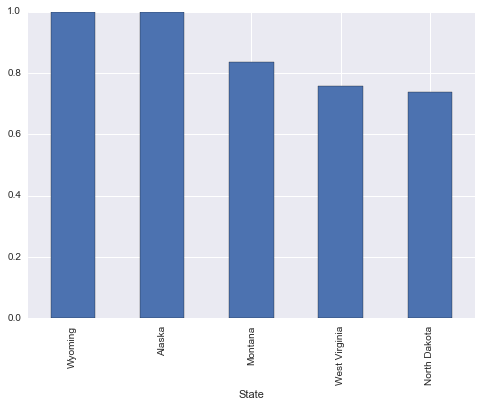

In [21]:
# Which state has the largest proportion of non-metropolitan interviewees, 
# ignoring states where all interviewees were non-metropolitan?

ct = pd.crosstab( CPS.MetroAreaCode == 'NA' , CPS.State ).transpose()
ct['non_metro_proportion'] = ct[1]/(ct[0]+ct[1])
ct.non_metro_proportion.sort_values(ascending=False).head().plot(kind='bar')

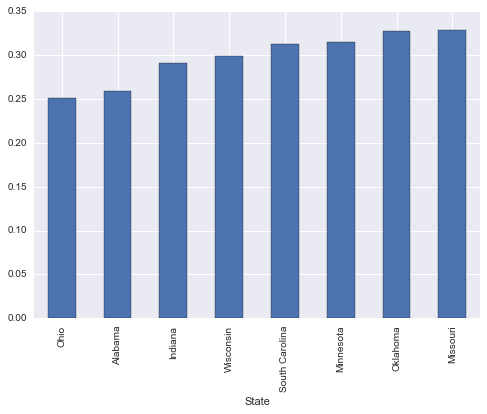

In [22]:
# Which state has a proportion of interviewees 
# living in a non-metropolitan area closest to 30%?

ct = pd.crosstab( CPS.MetroAreaCode == 'NA' , CPS.State ).transpose()
ct['non_metro_proportion'] = ct[1]/(ct[0]+ct[1])
ct.non_metro_proportion[(ct.non_metro_proportion < 0.35) & (ct.non_metro_proportion > 0.25)].sort_values(ascending=True).plot(kind='bar')

In [23]:
# Read two dictionaries into data frames called MetroAreaMap and CountryMap.

MetroAreaMap = pd.Series.from_csv('DATA\MetroAreaCodes.csv')
CountryMap = pd.Series.from_csv('DATA\CountryCodes.csv')

In [24]:
# map the metro area codes to the dataframe

def return_metro_area(x):
    if x == 'NA':
        return np.nan
    else:    
        return MetroAreaMap[str(int(x))]
    
CPS.MetroAreaCode = CPS.MetroAreaCode.apply(return_metro_area)

In [25]:
# map the country codes of the dataframe

def return_country(x):
    
    country_codes = CountryMap.index.unique()[1:-1]
    x = str(int(x))
    
    if str(x) in country_codes:
        return CountryMap[x]
    else:
        return

CPS.CountryOfBirthCode = CPS.CountryOfBirthCode.apply(return_country)

In [26]:
CPS.CountryOfBirthCode.isnull().sum()

257

In [30]:
# How many interviewees have a missing value for the new metropolitan area variable?

CPS.MetroAreaCode.isnull().sum()

34238

In [37]:
# Which metropolitan area has the largest number of interviewees?

CPS.MetroAreaCode.value_counts().head(1)

New York-Northern New Jersey-Long Island, NY-NJ-PA    5409
Name: MetroAreaCode, dtype: int64

In [113]:
# Which metropolitan area has the highest 
# proportion of interviewees of Hispanic ethnicity?

gb = CPS.groupby(['MetroAreaCode','Hispanic'])['MetroAreaCode'].count().unstack()
gb['hispanic%'] = gb[1]/(gb[0]+gb[1])
gb['hispanic%'].sort_values(ascending=False).head()

MetroAreaCode
Laredo, TX                    0.966292
McAllen-Edinburg-Pharr, TX    0.948718
Brownsville-Harlingen, TX     0.797468
El Paso, TX                   0.790984
El Centro, CA                 0.686869
Name: hispanic%, dtype: float64

In [126]:
# Determine the number of metropolitan areas in the United States 
# from which at least 20% of interviewees are Asian.

ct = pd.crosstab(CPS.MetroAreaCode,CPS.Race == 'Asian')
ct['asian%'] = ct[1]/(ct[0]+ct[1])
len(ct[ct['asian%'] >= 0.2])

4

In [139]:
# Determine which metropolitan area has the smallest 
# proportion of interviewees who have received no high school diploma.

ct = pd.crosstab(CPS.MetroAreaCode,CPS.Education == 'No high school diploma')
ct['no_high_school'] = ct[1]/(ct[0]+ct[1])
ct['no_high_school'].sort_values().head()

MetroAreaCode
Iowa City, IA               0.022901
Bowling Green, KY           0.034483
Kalamazoo-Portage, MI       0.039370
Champaign-Urbana, IL        0.040984
Bremerton-Silverdale, WA    0.045977
Name: no_high_school, dtype: float64

In [141]:
# How many interviewees have a missing value for the new country of birth variable?

CPS.CountryOfBirthCode.isnull().sum()

257

In [148]:
# Among all interviewees born outside of North America, 
# which country was the most common place of birth?

CPS.CountryOfBirthCode[~CPS.CountryOfBirthCode.isin(['United States','Mexico','Canada'])].value_counts().head()

Philippines    839
India          770
China          581
Puerto Rico    518
El Salvador    477
Name: CountryOfBirthCode, dtype: int64

In [186]:
# What proportion of the interviewees from the 
# "New York-Northern New Jersey-Long Island, NY-NJ-PA" 
# metropolitan area have a country of birth that is not 
# the United States?

to_check = "New York-Northern New Jersey-Long Island, NY-NJ-PA"

gb = CPS[CPS.MetroAreaCode == to_check].groupby('CountryOfBirthCode')['CountryOfBirthCode'].count().sort_values(ascending=False)
gb[1:].sum() / gb.sum()

0.3063497957668028

In [198]:
# Which metropolitan area has the largest number (note -- not proportion) 
# of interviewees with a country of birth in India?

CPS.groupby(['CountryOfBirthCode','MetroAreaCode'])['MetroAreaCode'].count()['India'].sort_values(ascending=False).head()

MetroAreaCode
New York-Northern New Jersey-Long Island, NY-NJ-PA    96
Washington-Arlington-Alexandria, DC-VA-MD-WV          50
Philadelphia-Camden-Wilmington, PA-NJ-DE              32
Chicago-Naperville-Joliet, IN-IN-WI                   31
Detroit-Warren-Livonia, MI                            30
Name: MetroAreaCode, dtype: int64

In [200]:
CPS.groupby(['Married','Region'])['Region'].count()

Married        Region   
Divorced       Midwest       2630
               Northeast     2122
               South         3586
               West          2813
Married        Midwest      13272
               Northeast    11078
               South        17301
               West         13858
NA             Midwest       6075
               Northeast     4507
               South         7967
               West          6789
Never Married  Midwest       6869
               Northeast     6508
               South         9606
               West          7789
Separated      Midwest        333
               Northeast      392
               South          821
               West           481
Widowed        Midwest       1505
               Northeast     1332
               South         2221
               West          1447
Name: Region, dtype: int64